In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Load the dataset
df = pd.read_csv("shark_tank_data.csv")

In [71]:
df.head()

,Startup,Industry,Founder,Gender,Funding Stage,Amount,Investors
0,Skinkraft,Beauty & Wellness,Dr. Raj,Male,Seed,60,"Anupam Mittal, Aman Gupta"
1,InnoTech AI,Tech,Neha Sharma,Female,Series A,150,Peeyush Bansal
2,GreenGrocery,Food & Beverage,Karan Mehta,Male,Pre-Seed,30,Aman Gupta
3,FitGenie,Health & Fitness,Meera Das,Female,Seed,75,Anupam Mittal
4,TravelEase,Travel,Rahul Jain,Male,Series A,200,Namita Thapar


In [73]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [75]:
# Convert amount to numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [77]:
# -- Grouping by Industry
industry_funding = df.groupby("Industry")["Amount"].sum().sort_values(ascending=False)

In [79]:
# -- Funding Stage vs Success (Count)
funding_stage_success = df["Funding_Stage"].value_counts()

In [81]:
# -- Gender-Based Analysis
gender_funding = df.groupby("Gender")["Amount"].sum()


In [83]:
# -- Investors by Industry
df['Investors_List'] = df['Investors'].astype(str).str.split(',')
industry_investors = df.explode('Investors_List').groupby(['Industry', 'Investors_List']).size().reset_index(name='Deals')

In [85]:
# Export for Tableau
df.to_excel("shark_tank_cleaned.xlsx", index=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3216\2523669699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_funding.values, y=industry_funding.index, palette='viridis')


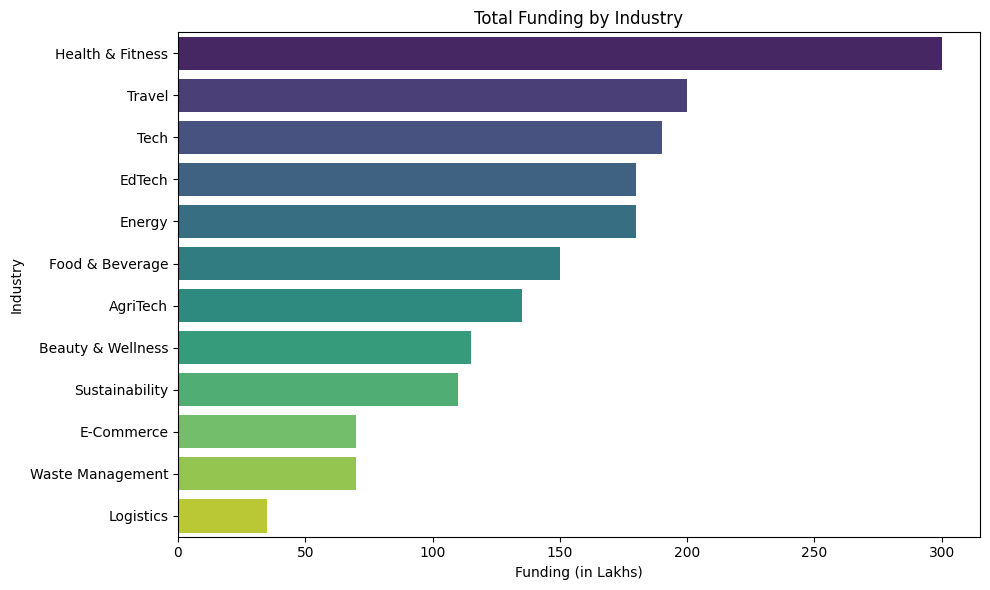

In [87]:
plt.figure(figsize=(10,6))
sns.barplot(x=industry_funding.values, y=industry_funding.index, palette='viridis')
plt.title("Total Funding by Industry")
plt.xlabel("Funding (in Lakhs)")
plt.tight_layout()
plt.savefig("industry_funding_summary.png")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3216\1923763680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Funding_Stage", palette='pastel')


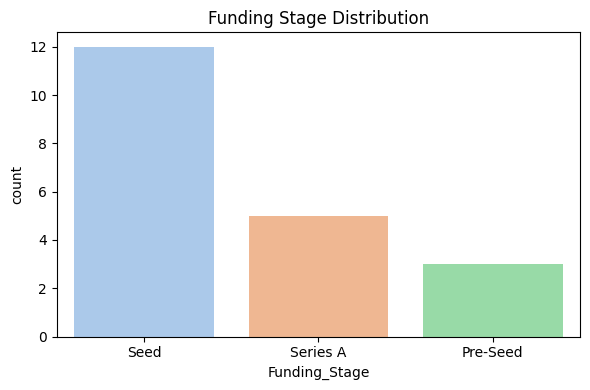

In [89]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Funding_Stage", palette='pastel')
plt.title("Funding Stage Distribution")
plt.tight_layout()
plt.savefig("funding_stage_distribution.png")


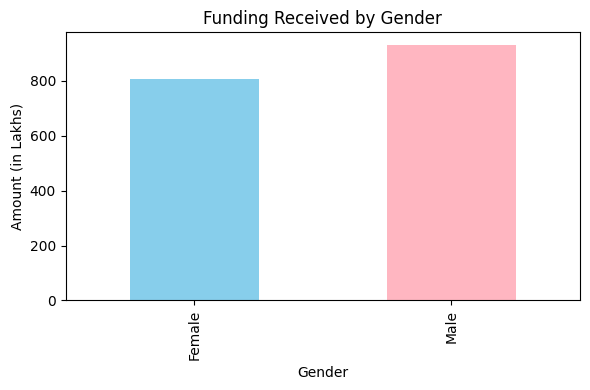

In [91]:
plt.figure(figsize=(6,4))
gender_funding.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title("Funding Received by Gender")
plt.ylabel("Amount (in Lakhs)")
plt.tight_layout()
plt.savefig("gender_funding_summary.png")


In [93]:
founder_summary = df.groupby(["Founder", "Gender", "Funding_Stage"]).agg({
    "Amount": "sum",
    "Industry": "first",
    "Investors": "first"
}).reset_index()

founder_summary.to_csv("founder_success_summary.csv", index=False)

print("✅ Analysis complete. Check the following files:\n")
print("1. shark_tank_cleaned.xlsx - For Tableau dashboard\n2. industry_funding_summary.png\n3. funding_stage_distribution.png\n4. gender_funding_summary.png\n5. founder_success_summary.csv")


✅ Analysis complete. Check the following files:

1. shark_tank_cleaned.xlsx - For Tableau dashboard
2. industry_funding_summary.png
3. funding_stage_distribution.png
4. gender_funding_summary.png
5. founder_success_summary.csv
